In [ ]:
# import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
sns.set(color_codes=True)

df = pd.read_csv("olympics.csv")

# Data Exploration

### 1. Select a Dataset

[*Carbon Major Emissions Data*](https://github.com/rfordatascience/tidytuesday/tree/main/data/2024/2024-05-21) from GitHub tiduytuesday.

In [22]:
print(df.head())

   id                      name sex   age  height  weight            team  \
0   1                 A Dijiang   M  24.0   180.0    80.0           China   
1   2                  A Lamusi   M  23.0   170.0    60.0           China   
2   3       Gunnar Nielsen Aaby   M  24.0     NaN     NaN         Denmark   
3   4      Edgar Lindenau Aabye   M  34.0     NaN     NaN  Denmark/Sweden   
4   5  Christine Jacoba Aaftink   F  21.0   185.0    82.0     Netherlands   

   noc        games  year  season       city          sport  \
0  CHN  1992 Summer  1992  Summer  Barcelona     Basketball   
1  CHN  2012 Summer  2012  Summer     London           Judo   
2  DEN  1920 Summer  1920  Summer  Antwerpen       Football   
3  DEN  1900 Summer  1900  Summer      Paris     Tug-Of-War   
4  NED  1988 Winter  1988  Winter    Calgary  Speed Skating   

                              event medal  
0       Basketball Men's Basketball   NaN  
1      Judo Men's Extra-Lightweight   NaN  
2           Football Men's

In [23]:
print(df.describe())

                  id            age         height         weight  \
count  271116.000000  261642.000000  210945.000000  208241.000000   
mean    68248.954396      25.556898     175.338970      70.702393   
std     39022.286345       6.393561      10.518462      14.348020   
min         1.000000      10.000000     127.000000      25.000000   
25%     34643.000000      21.000000     168.000000      60.000000   
50%     68205.000000      24.000000     175.000000      70.000000   
75%    102097.250000      28.000000     183.000000      79.000000   
max    135571.000000      97.000000     226.000000     214.000000   

                year  
count  271116.000000  
mean     1978.378480  
std        29.877632  
min      1896.000000  
25%      1960.000000  
50%      1988.000000  
75%      2002.000000  
max      2016.000000  


### 3. Data cleanup

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      271116 non-null  int64  
 1   name    271116 non-null  object 
 2   sex     271116 non-null  object 
 3   age     261642 non-null  float64
 4   height  210945 non-null  float64
 5   weight  208241 non-null  float64
 6   team    271116 non-null  object 
 7   noc     271116 non-null  object 
 8   games   271116 non-null  object 
 9   year    271116 non-null  int64  
 10  season  271116 non-null  object 
 11  city    271116 non-null  object 
 12  sport   271116 non-null  object 
 13  event   271116 non-null  object 
 14  medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


There's quite a lot of missing data for age, height, and weight. Let's see what will happen to the total number of rows if rows with any missing value for [age, height, weight] are dropped.

Also, if the athelete did not win a medal for an event, let's set their `medal` value to 'None'.

In [25]:
df = df.dropna(subset=['age', 'height', 'weight'])
df['medal'] = df['medal'].fillna('None')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 206165 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      206165 non-null  int64  
 1   name    206165 non-null  object 
 2   sex     206165 non-null  object 
 3   age     206165 non-null  float64
 4   height  206165 non-null  float64
 5   weight  206165 non-null  float64
 6   team    206165 non-null  object 
 7   noc     206165 non-null  object 
 8   games   206165 non-null  object 
 9   year    206165 non-null  int64  
 10  season  206165 non-null  object 
 11  city    206165 non-null  object 
 12  sport   206165 non-null  object 
 13  event   206165 non-null  object 
 14  medal   206165 non-null  object 
dtypes: float64(3), int64(2), object(10)
memory usage: 25.2+ MB


Okay, not bad. Considering that we only had 208241 rows with a `weight` value, the fact that we ended up with 206165 total rows means that there was likely a large overlap between those with age missing, and those with height and weight missing.

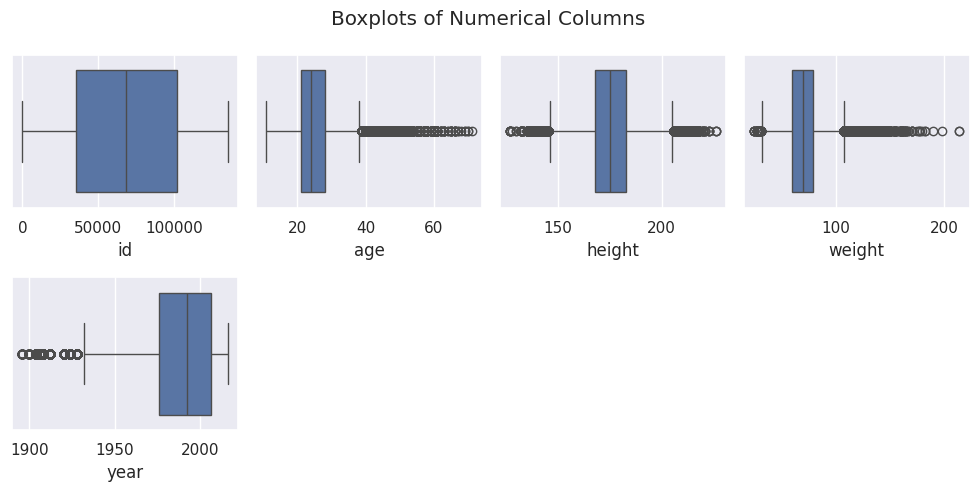

In [26]:
# boxplots for each numerical column
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
fig, ax = plt.subplots(2, 4, figsize=(10, 5))
ax = ax.ravel()

index = 0
for col in numerical_columns:
    sns.boxplot(x=df[col], ax=ax[index])
    index += 1
    
# remove empty subplots
for i in range(index, len(ax)):
    fig.delaxes(ax[i])

plt.suptitle('Boxplots of Numerical Columns')
plt.tight_layout()
plt.show()

`Age` and `Weight` may be positively skewed, but this is to be expected. Although it can be argued that `Age` and `Weight` have outliers outside of 1.5IQRs, I have chosen to leave them in as it could be important to the data (for example, it would make sense for wrestlers to have high weights).

# Exploratory visualizations

<class 'pandas.core.frame.DataFrame'>
Index: 206165 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      206165 non-null  int64  
 1   name    206165 non-null  object 
 2   sex     206165 non-null  object 
 3   age     206165 non-null  float64
 4   height  206165 non-null  float64
 5   weight  206165 non-null  float64
 6   team    206165 non-null  object 
 7   noc     206165 non-null  object 
 8   games   206165 non-null  object 
 9   year    206165 non-null  int64  
 10  season  206165 non-null  object 
 11  city    206165 non-null  object 
 12  sport   206165 non-null  object 
 13  event   206165 non-null  object 
 14  medal   206165 non-null  object 
dtypes: float64(3), int64(2), object(10)
memory usage: 25.2+ MB


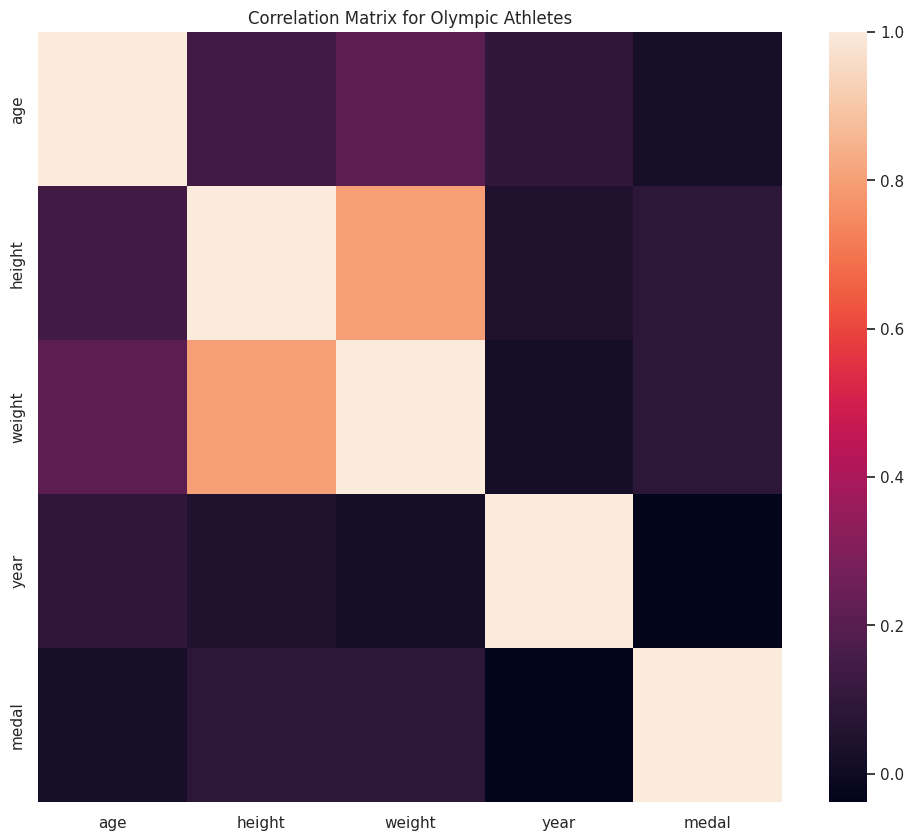

In [44]:
# map ordinals to numerical values
df.info()
df2 = df.drop(columns=['id', 'name', 'sex', 'team', 'noc', 'games', 'season', 'city', 'sport', 'event'])
df2['medal'] = df2['medal'].map({'None': 0, 'Bronze': 1, 'Silver': 2, 'Gold': 3})

plt.figure(figsize=(12, 10))
sns.heatmap(df2.corr(), annot=False)
plt.title('Correlation Matrix for Olympic Athletes')
plt.show()

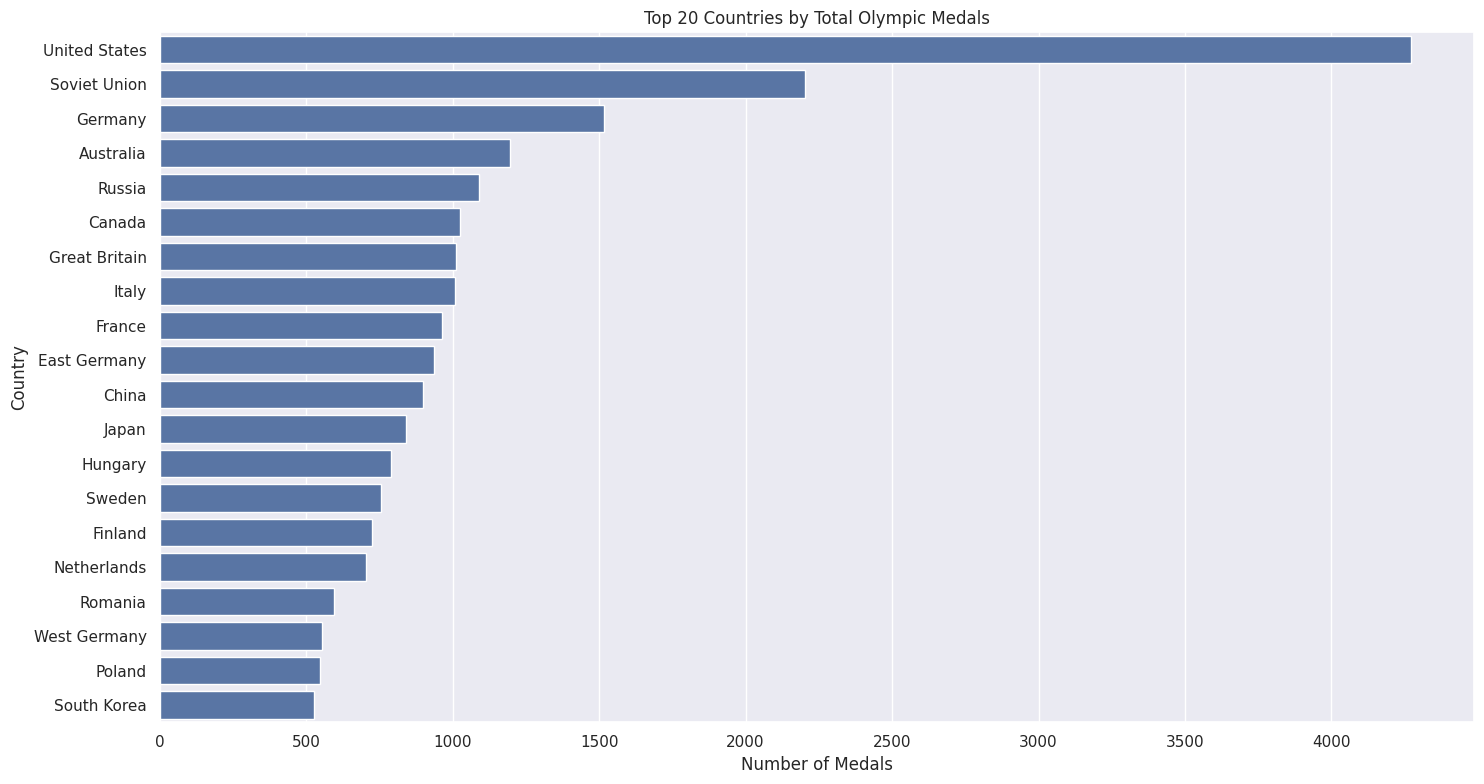

In [ ]:
# medal count by team
medal_counts = df[df['medal'] != 'None'].groupby('team')['medal'].count().sort_values(ascending=False).head(20)

plt.figure(figsize=(15, 8))
sns.barplot(x=medal_counts.values, y=medal_counts.index)
plt.title('Top 20 Countries by Total Olympic Medals')
plt.xlabel('Number of Medals')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

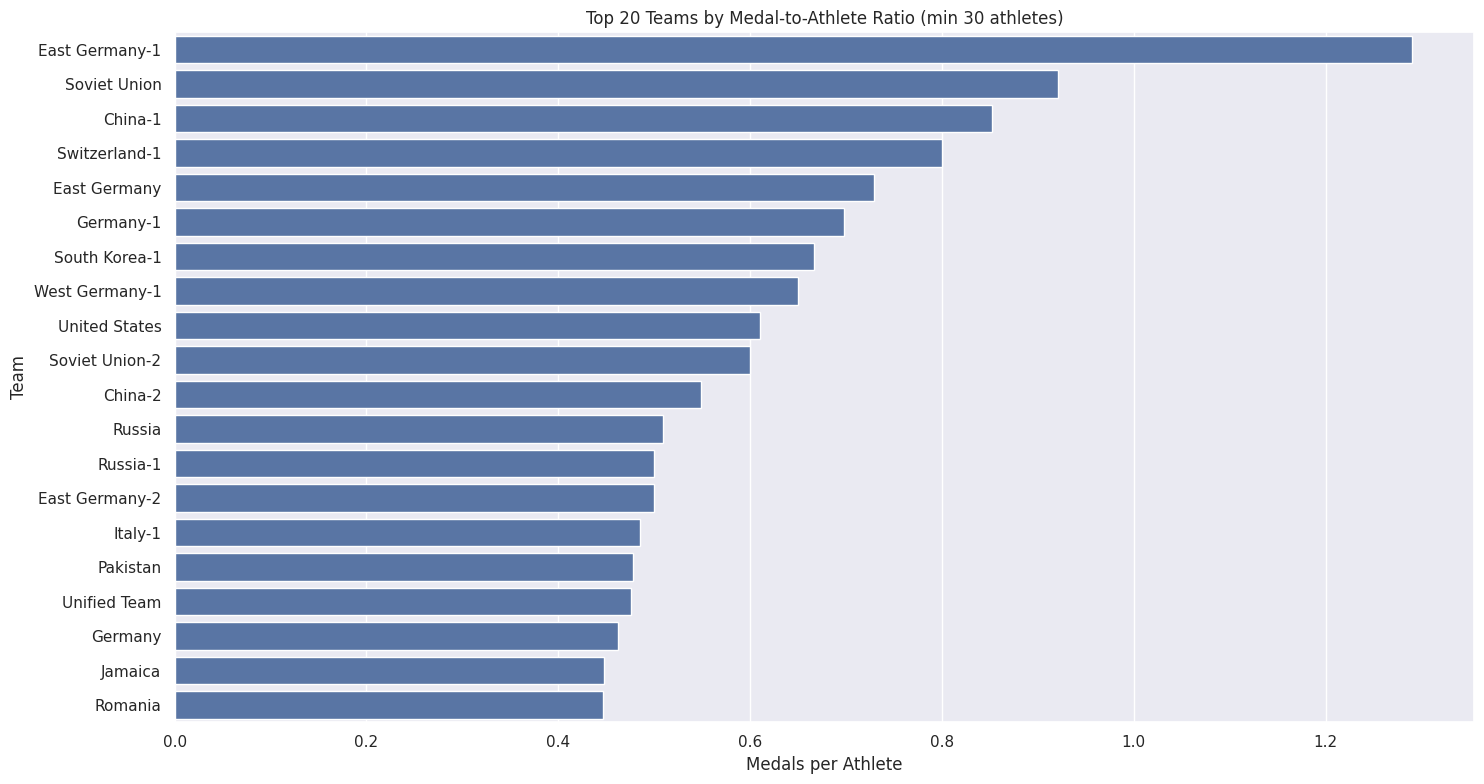

In [ ]:
# Calculate medal efficiency ratio
medal_counts = df[df['medal'] != 'None'].groupby('team')['medal'].count()
athlete_counts = df.groupby('team')['name'].nunique()
medal_ratio = (medal_counts / athlete_counts).sort_values(ascending=False)

min_athletes = 30
filtered_ratio = medal_ratio[athlete_counts[medal_ratio.index] >= min_athletes].head(20)

plt.figure(figsize=(15, 8))
sns.barplot(x=filtered_ratio.values, y=filtered_ratio.index)
plt.title(f'Top 20 Teams by Medal-to-Athlete Ratio (min {min_athletes} athletes)')
plt.xlabel('Medals per Athlete')
plt.ylabel('Team')
plt.tight_layout()
plt.show()

### Clean up team names
Some teams are listed with suffixes like '-1' or '-2'. Let's consolidate these into their main country names.

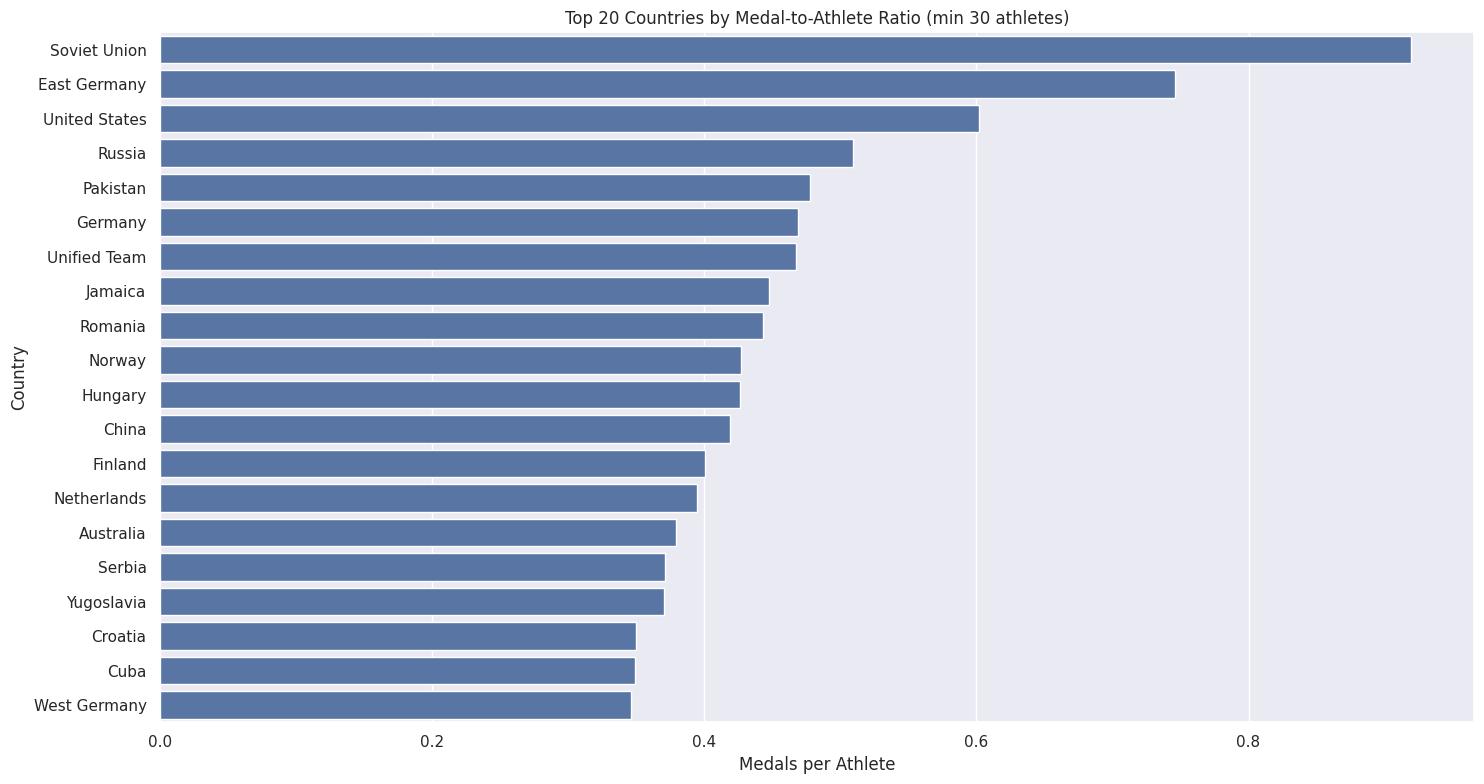

In [ ]:
import re
def clean_team_name(team):
    # remove -1, -2 etc. from team names
    return re.sub(r'-\d+$', '', team)

# create a copy of df with cleaned team names
df_cleaned = df.copy()
df_cleaned['team'] = df_cleaned['team'].apply(clean_team_name)

# Recalculate medal efficiency with cleaned names
medal_counts_clean = df_cleaned[df_cleaned['medal'] != 'None'].groupby('team')['medal'].count()
athlete_counts_clean = df_cleaned.groupby('team')['name'].nunique()
medal_ratio_clean = (medal_counts_clean / athlete_counts_clean).sort_values(ascending=False)

min_athletes = 30
filtered_ratio_clean = medal_ratio_clean[athlete_counts_clean[medal_ratio_clean.index] >= min_athletes].head(20)

plt.figure(figsize=(15, 8))
sns.barplot(x=filtered_ratio_clean.values, y=filtered_ratio_clean.index)
plt.title(f'Top 20 Countries by Medal-to-Athlete Ratio (min {min_athletes} athletes)')
plt.xlabel('Medals per Athlete')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

In [ ]:
# Save the cleaned DataFrame to a new CSV file
#df_cleaned.to_csv("olympics_cleaned.csv", index=False)

In [ ]:
print("Unique sports in the dataset:")
print(df['sport'].unique())

Unique sports in the dataset:
['Basketball' 'Judo' 'Speed Skating' 'Cross Country Skiing' 'Ice Hockey'
 'Badminton' 'Sailing' 'Biathlon' 'Gymnastics' 'Athletics' 'Alpine Skiing'
 'Weightlifting' 'Wrestling' 'Luge' 'Rowing' 'Bobsleigh' 'Swimming'
 'Football' 'Equestrianism' 'Shooting' 'Taekwondo' 'Boxing' 'Fencing'
 'Diving' 'Canoeing' 'Handball' 'Water Polo' 'Tennis' 'Cycling' 'Hockey'
 'Figure Skating' 'Softball' 'Archery' 'Volleyball'
 'Synchronized Swimming' 'Modern Pentathlon' 'Table Tennis'
 'Nordic Combined' 'Baseball' 'Rhythmic Gymnastics' 'Freestyle Skiing'
 'Rugby Sevens' 'Trampolining' 'Beach Volleyball' 'Triathlon'
 'Ski Jumping' 'Curling' 'Golf' 'Snowboarding' 'Short Track Speed Skating'
 'Skeleton' 'Rugby' 'Tug-Of-War' 'Art Competitions' 'Lacrosse'
 'Motorboating']


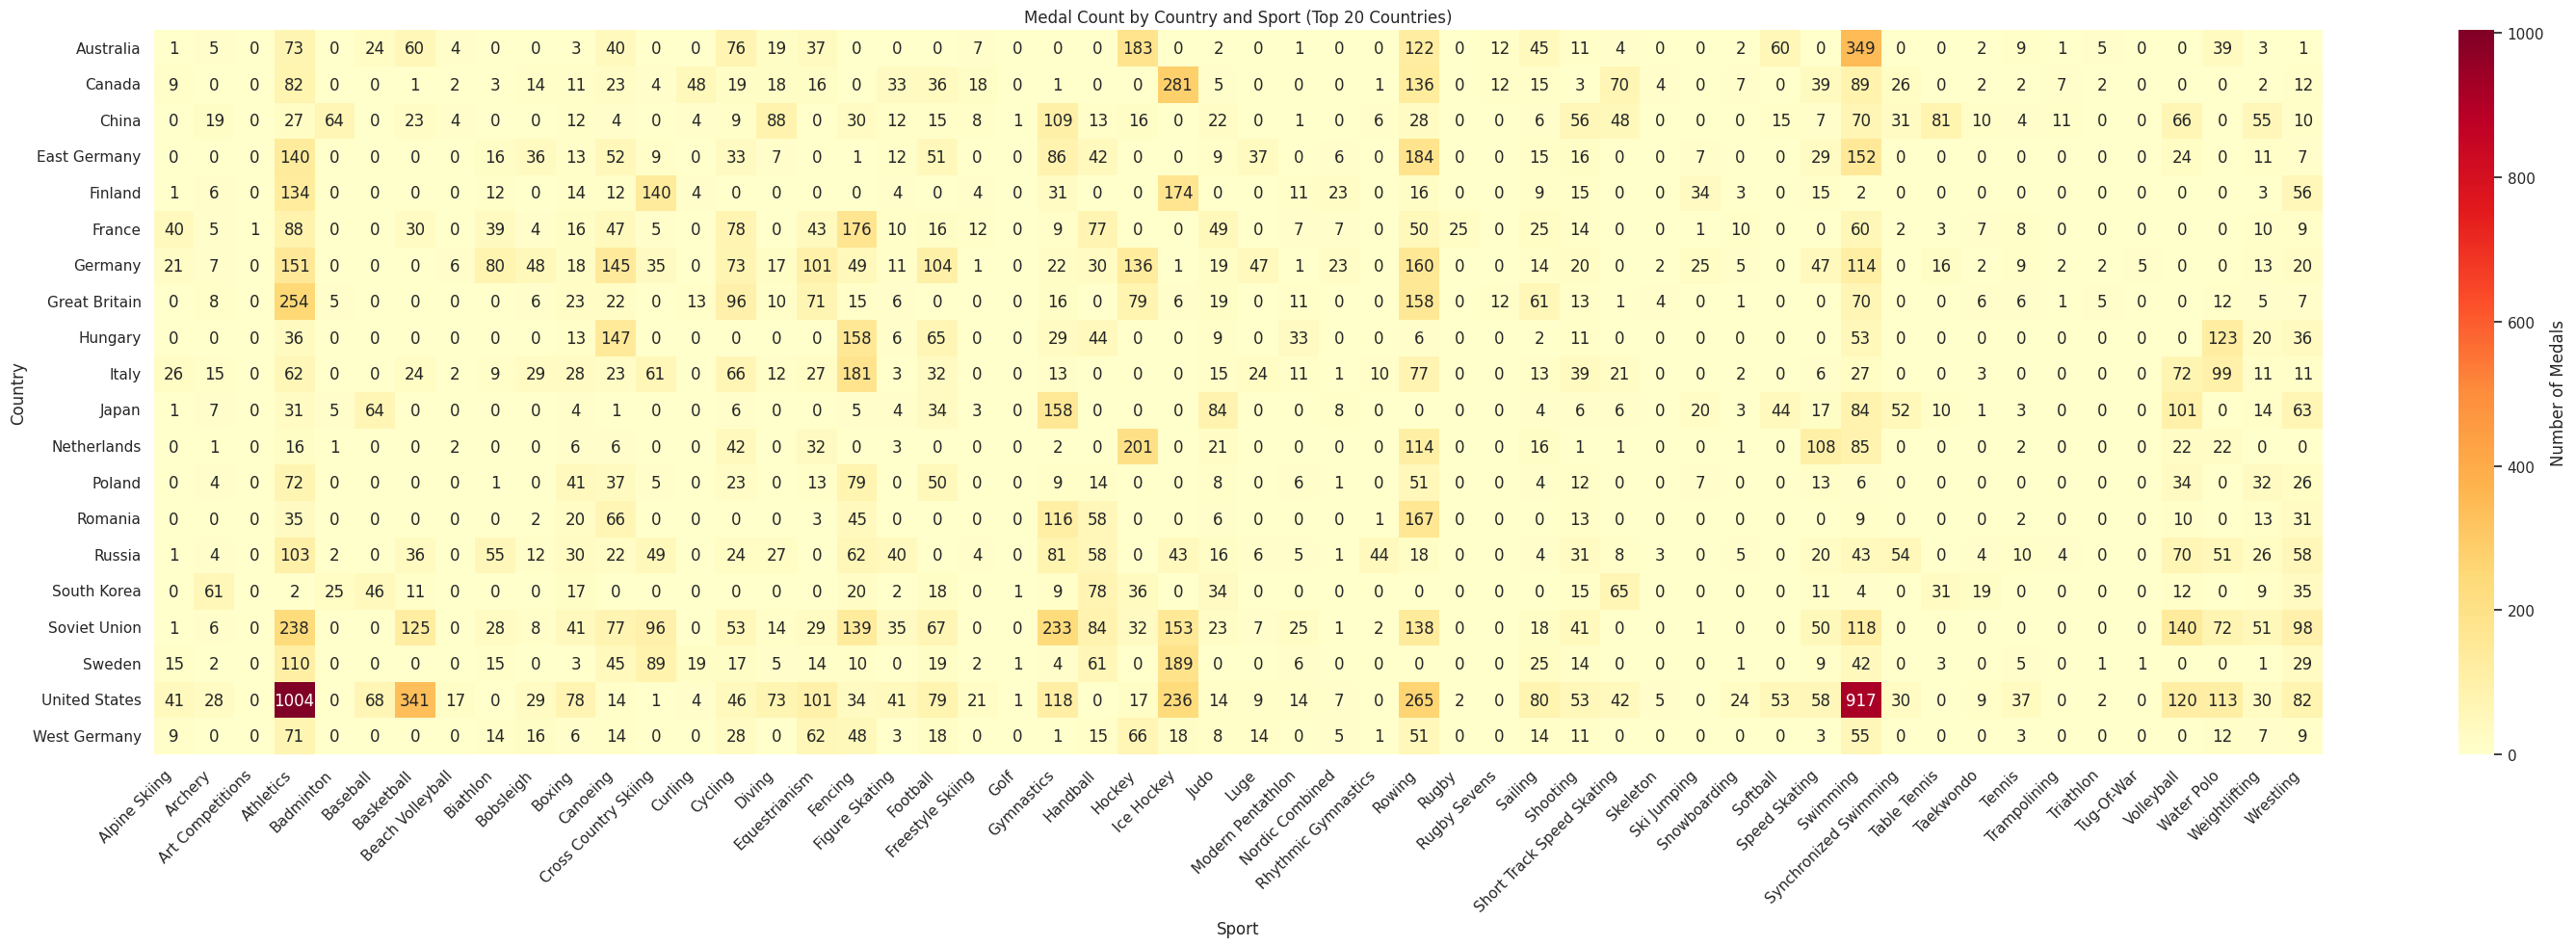

In [55]:
# Get top 20 countries by total medals
top_20_countries = df_cleaned[df_cleaned['medal'] != 'None'].groupby('team')['medal'].count().nlargest(20).index

medals_by_sport = pd.pivot_table(
    df_cleaned[df_cleaned['team'].isin(top_20_countries) & (df_cleaned['medal'] != 'None')],
    values='medal',
    index='team',
    columns='sport',
    aggfunc='count',
    fill_value=0
)

plt.figure(figsize=(30, 10))
sns.heatmap(medals_by_sport, cmap='YlOrRd', annot=True, fmt='g', cbar_kws={'label': 'Number of Medals'})
plt.title('Medal Count by Country and Sport (Top 20 Countries)')
plt.xlabel('Sport')
plt.ylabel('Country')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [58]:
# print sorted year values unique
print("Unique years in the dataset:")
print(sorted(df['year'].unique()))

Unique years in the dataset:
[np.int64(1896), np.int64(1900), np.int64(1904), np.int64(1906), np.int64(1908), np.int64(1912), np.int64(1920), np.int64(1924), np.int64(1928), np.int64(1932), np.int64(1936), np.int64(1948), np.int64(1952), np.int64(1956), np.int64(1960), np.int64(1964), np.int64(1968), np.int64(1972), np.int64(1976), np.int64(1980), np.int64(1984), np.int64(1988), np.int64(1992), np.int64(1994), np.int64(1996), np.int64(1998), np.int64(2000), np.int64(2002), np.int64(2004), np.int64(2006), np.int64(2008), np.int64(2010), np.int64(2012), np.int64(2014), np.int64(2016)]
